<a href="https://colab.research.google.com/github/BetsyGeorge3/Energy_pricing-with-arima/blob/main/Energy_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA



In [6]:
# Load the historical energy price data
data = pd.read_csv('energy_dataset.csv')

data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96,NaN,3253,30619,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51,NaN,3353,29932,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36,NaN,3404,27903,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29,NaN,3273,25450,25801.0,63.93,69.89


In [9]:
# Convert the 'Date' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Set 'Date' column as index
data.set_index('time', inplace=True)



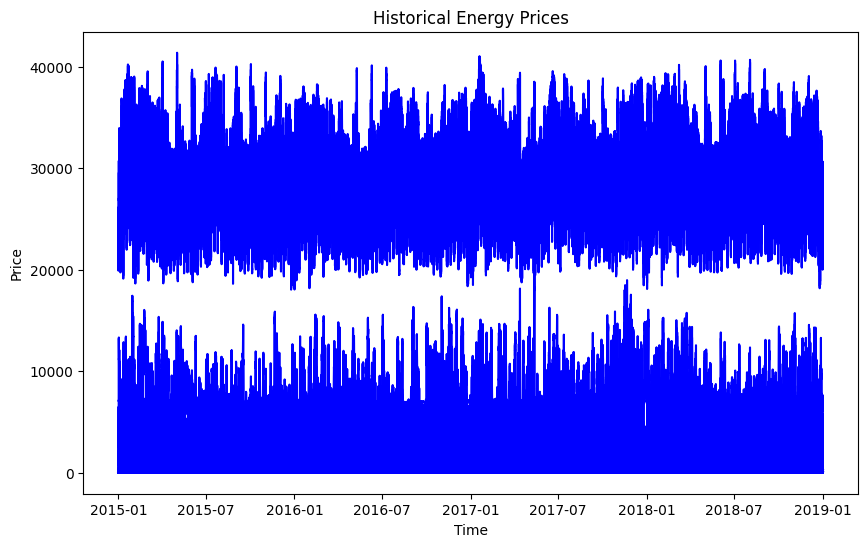

In [10]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, color='blue')
plt.title('Historical Energy Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()



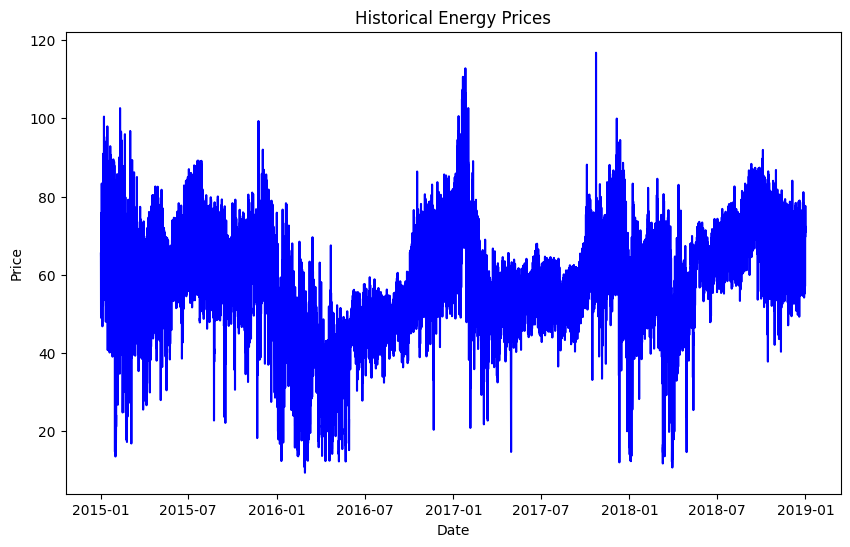

In [15]:
# Set 'Date' column as index
#data.set_index('time', inplace=True)

# Select a single column (assuming 'Price' is the column containing energy prices)
price_data = data['price actual']

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(price_data, color='blue')
plt.title('Historical Energy Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

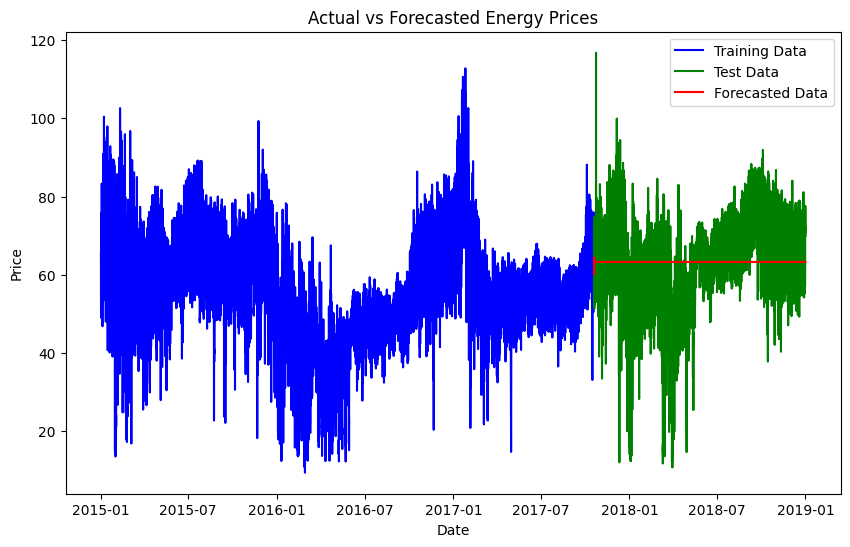

In [18]:

# Define train and test datasets
train_size = int(len(price_data) * 0.7)
train_data, test_data = price_data.iloc[:train_size], price_data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # Example order (p, d, q)
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test_data))

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, color='blue', label='Training Data')
plt.plot(test_data.index, test_data, color='green', label='Test Data')
plt.plot(test_data.index, forecast, color='red', label='Forecasted Data')
plt.title('Actual vs Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



Mean Squared Error: 153.16316986896143


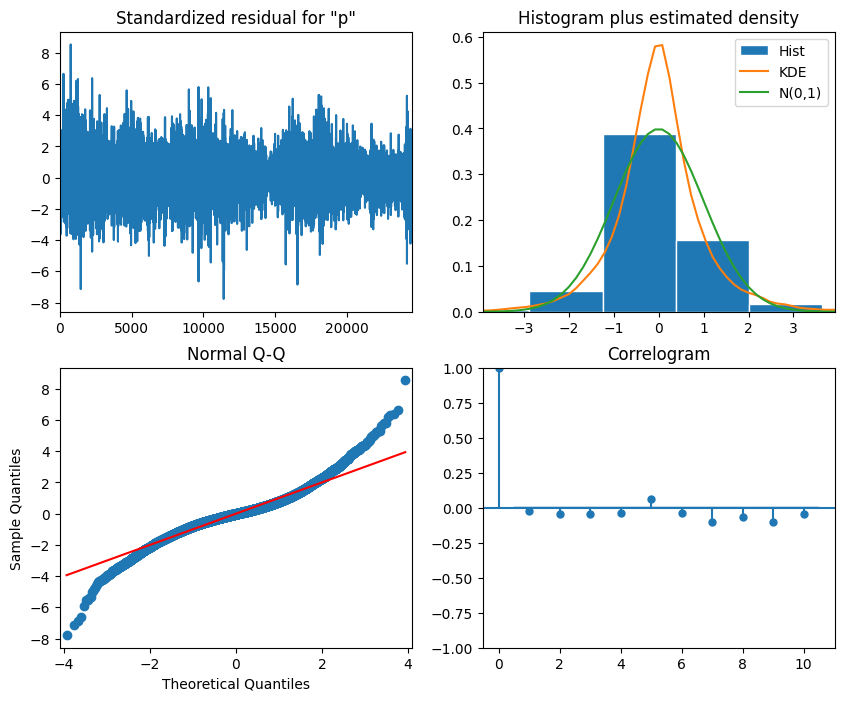

In [19]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
print('Mean Squared Error:', mse)

# Optional: Plot diagnostics of the ARIMA model
arima_model.plot_diagnostics(figsize=(10, 8))
plt.show()

In [31]:
# Forecast future values
forecast_period = 24  # Adjust as needed
forecast = arima_model.get_forecast(steps=forecast_period)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


KeyError: 'lower price'

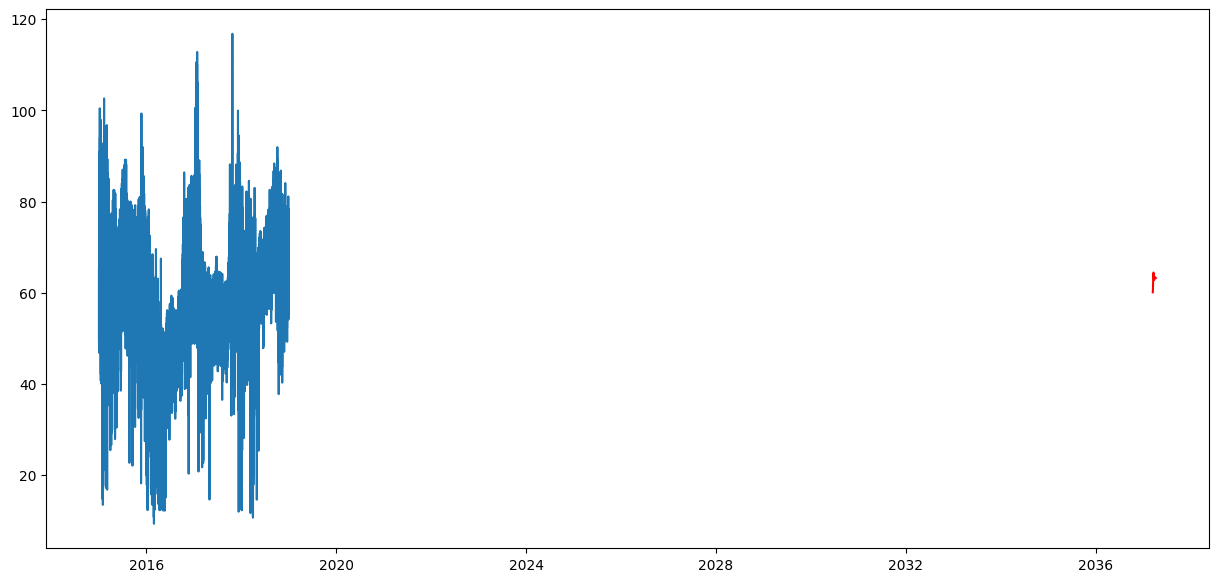

In [43]:
# Plot the actual and forecasted values
plt.figure(figsize=(15, 7))
plt.plot(data.index, price_data, label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast.predicted_mean.index, forecast.conf_int()['lower price'], forecast.conf_int()['upper price'], color='pink')  # Use the correct column names for confidence intervals
plt.legend()
plt.show()

In [22]:
# Define the number of future periods to forecast
forecast_periods = 24  # Adjust as needed

In [46]:
forecasted_values = arima_model.get_forecast(steps=forecast_periods)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
# Access the predicted values
predicted_mean = forecasted_values.predicted_mean



24544    60.086501
24545    60.530788
24546    61.481632
24547    62.901535
24548    63.984524
24549    64.427409
24550    64.410955
24551    64.079050
24552    63.580879
24553    63.136634
24554    62.876983
24555    62.811720
24556    62.898751
24557    63.070168
24558    63.246970
24559    63.372301
24560    63.425271
24561    63.412642
24562    63.357927
24563    63.290684
24564    63.235311
24565    63.204777
24566    63.200565
24567    63.215870
Name: predicted_mean, dtype: float64